In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import requests
import numpy as np
from io import StringIO
from math import sin, cos, sqrt, atan2, radians

In [2]:
test = pd.read_csv("test.csv")
train = pd.read_csv("train.csv")

In [3]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625134 entries, 0 to 625133
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  625134 non-null  object 
 1   vendor_id           625134 non-null  int64  
 2   pickup_datetime     625134 non-null  object 
 3   passenger_count     625134 non-null  int64  
 4   pickup_longitude    625134 non-null  float64
 5   pickup_latitude     625134 non-null  float64
 6   dropoff_longitude   625134 non-null  float64
 7   dropoff_latitude    625134 non-null  float64
 8   store_and_fwd_flag  625134 non-null  object 
dtypes: float64(4), int64(2), object(3)
memory usage: 42.9+ MB


In [4]:
test.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,N
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,N
2,id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,N
3,id2150126,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,N
4,id1598245,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,N


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [6]:
train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [7]:
# Function to calculate Euclidean distance

#define x and y values
x1= train['pickup_latitude']
x2= train['dropoff_latitude']
y1= train['pickup_longitude']
y2=train['dropoff_longitude']

# Euclidean formula
distance = np.sqrt((x2 - x1)**2 + (y2 - y1)**2)

train['distance'] = distance
print(train['distance'])


0          0.017680
1          0.020456
2          0.059934
3          0.013438
4          0.010690
             ...   
1458639    0.013791
1458640    0.057998
1458641    0.076327
1458642    0.010962
1458643    0.011106
Name: distance, Length: 1458644, dtype: float64


In [8]:
train['pickup_datetime'] = pd.to_datetime(train['pickup_datetime'])
train['dropoff_datetime'] = pd.to_datetime(train['dropoff_datetime'])
difference_seconds = (train['dropoff_datetime'] - train['pickup_datetime']).dt.total_seconds()
train['difference_seconds'] = difference_seconds
print(train['difference_seconds'])

0           455.0
1           663.0
2          2124.0
3           429.0
4           435.0
            ...  
1458639     778.0
1458640     655.0
1458641     764.0
1458642     373.0
1458643     198.0
Name: difference_seconds, Length: 1458644, dtype: float64


In [9]:
minutes_duration = train['trip_duration']/60
train['minutes_duration'] = minutes_duration
print(train['minutes_duration'])

0           7.583333
1          11.050000
2          35.400000
3           7.150000
4           7.250000
             ...    
1458639    12.966667
1458640    10.916667
1458641    12.733333
1458642     6.216667
1458643     3.300000
Name: minutes_duration, Length: 1458644, dtype: float64


In [10]:
hours_duration = train['minutes_duration']/60
train['hours_duration'] = hours_duration
print(train['hours_duration'])

0          0.126389
1          0.184167
2          0.590000
3          0.119167
4          0.120833
             ...   
1458639    0.216111
1458640    0.181944
1458641    0.212222
1458642    0.103611
1458643    0.055000
Name: hours_duration, Length: 1458644, dtype: float64


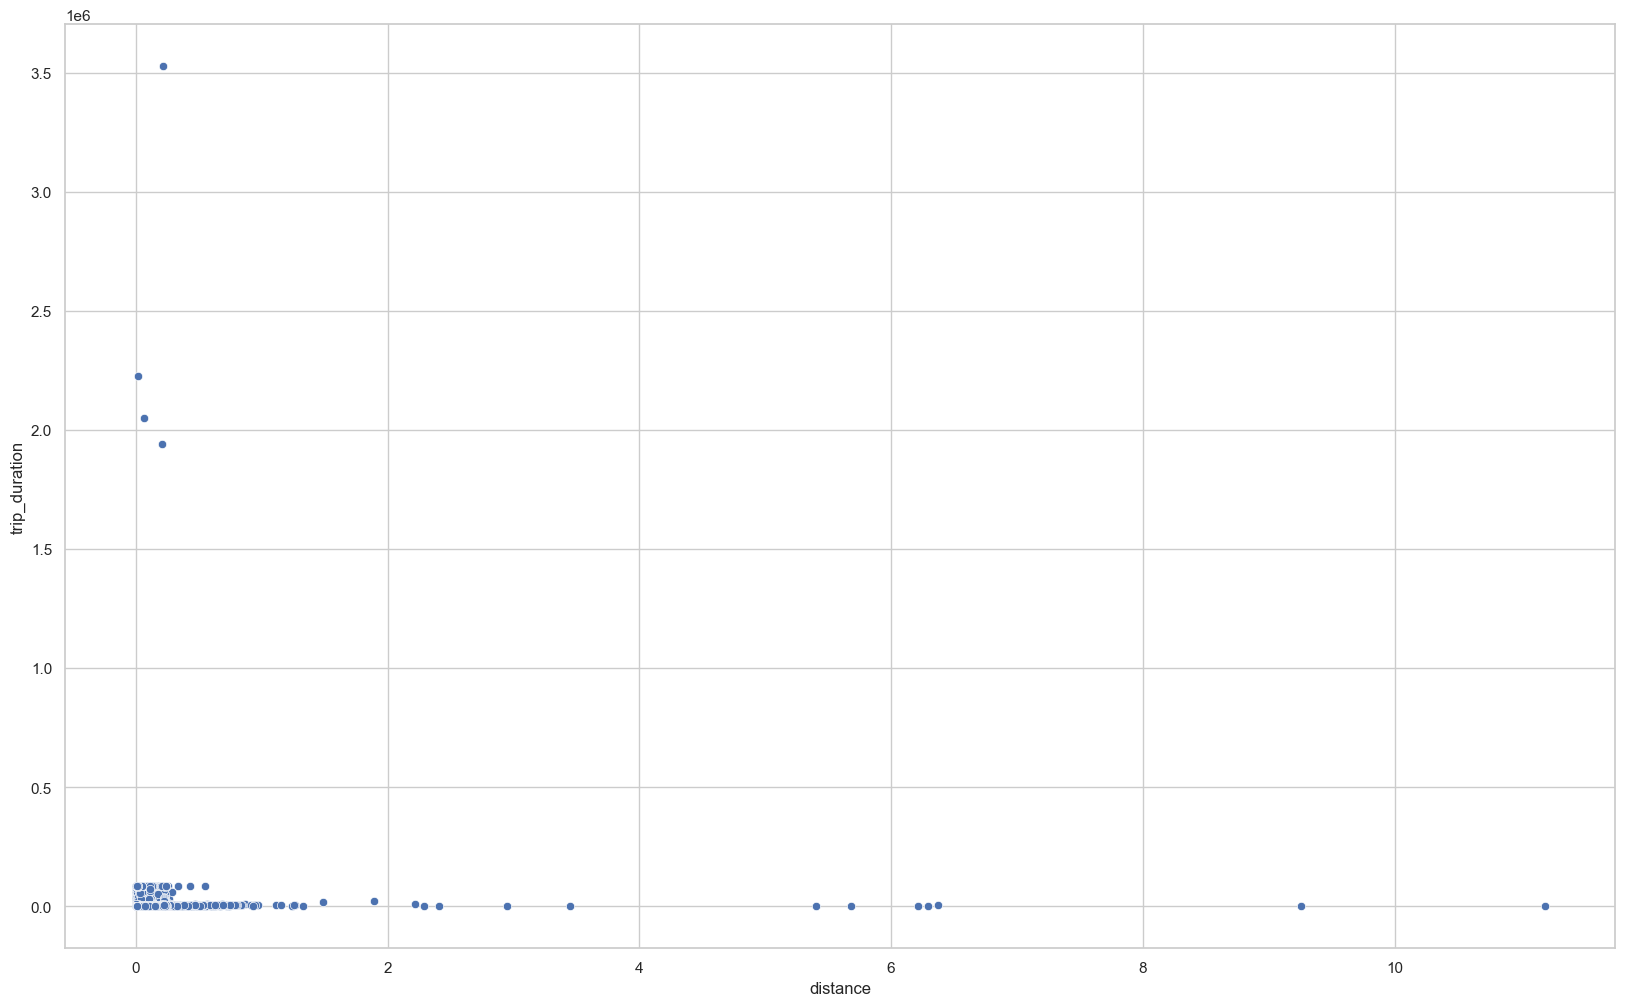

In [26]:
# Assuming 'train' is your DataFrame
sns.set(style="whitegrid")

# Set the size of the figure
plt.figure(figsize=(20, 12))

# Create the scatterplot
sns.scatterplot(data=train, x="distance", y="trip_duration")

# Show the plot
plt.show()